# <u> STA130 Tutorial 6 - Simple Linear Regression <u>

## Review   [15 minutes]
1. Discuss how the idea of $y=mx+b$ can be extended to $$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$ where $$\epsilon_i \sim \mathcal N\left(0, \sigma^2\right) $$
<br><br>
2. Recall the assumptions associated with our linear regression model. (will be discussed later in depth)

$$ \text{1. Errors are normally distributed}$$

$$ \text{2. Linear form is true and the independent variable is measured without error}$$

$$ \text{3. Homoscedasticity - variability of errors does not change across } x_i$$

$$ \text{4. Independence}$$



## Mini Lecture [20 minutes]
### Correlation
1. Briefly explain the idea that correlation measures the 'uniform strength of linear association' between an independent and dependent variable and that correlation is not 'causation'.

\begin{align}
r_{xy} & = {} \require{cancel}\frac{Cov(x,y)}{s_x s_y} = \frac{\frac{1}{n-1} \sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)}{s_x s_y}\\ & = {}  \frac{\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)\xcancel{/(n-1)}}{\sqrt{\sum_{i=1}^n (x_i-\bar x)^2\xcancel{/(n-1)}} \sqrt{\sum_{i=1}^n (y_i-\bar y)^2\xcancel{/(n-1)}} }
\end{align}

2. Discuss the above formula, explaining how covariance is very similar to variance, except with x and y instead, and that correlation is the 'covariance between x and y scaled by their standard deviations'.

### Exercise

| | |
|-|-|
|Let's play a little game then...<br><br>CLICK ME if you dare:<br>https://istics.net/Correlations/<br><br><br>Can you guess which plot<br>corresponds to which<br>correlation coefficient?<br><br><br><br><br><br><br><br><br>|<img src="im/7/guess_corr.png" style="width:800px">|

### Short discussion

- Will 'scaling' the independent or dependent variable have any effect on the correlation?
<br><br>
- Do not overestimate the usefulness of correlation, it can only tell us how tightly our data points are packed around a potential 'best-fit' or 'average' line.
<br><br>
- What matters mostly is the absolute value of the correlation, the sign only tells us the empirical slope of the data


## The Linear Regression Model [20 minutes]
|<img src="https://mobiledevmemo.com/wp-content/uploads/2012/10/w5449egf111.gif" alt="" style="width: 450px;"/>|

- The key idea in our understanding of linear regression is that we can attribute a linear relationship to a particular dataset.
<br><br>
- (Continuous) Outcome/Response/Dependent variable: $\;\; Y_i$
<br><br>
- Explanatory/Independent variable/Covariate/Feature/Predictor: $\;\; x_i$
<br><br>
- Our model has two parameters - **Intercept and Slope** - which we use to describe a relationship between $\; Y_i$ and $\; x_i$

 $$Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$ 

- $\epsilon_i$ is the **Noise** or the **Error** in our model which follows a normal distribution.

### Fitted Model

- When we actually fit a linear model to a dataset, we obtain the following equation which contains estimates of what the slope and intercept of the line should be.
<br><br>
  $$\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$$ 
  <br><br>
- Discuss how the above equation differs from  $Y_i = \beta_0 + \beta_1 x_i + \epsilon_i$
<br><br>
- Discuss how **'Residuals'** $\hat \epsilon_i = y_i - \hat y_i = y_i - \hat \beta_0 + \hat \beta_1 x_i $ differ from error terms.
  


Text(0.5, 1.0, 'Example of Fitted Simple Linear Regression Model')

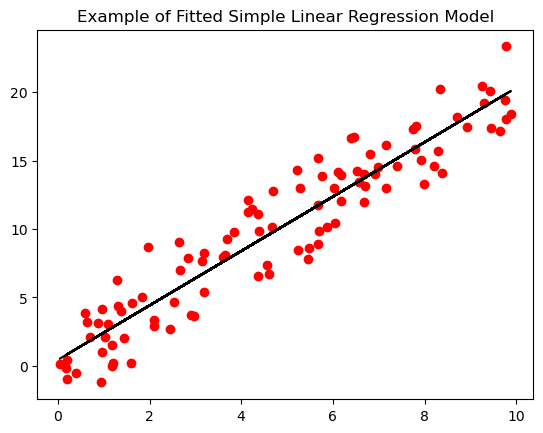

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(0)
X = np.random.rand(100, 1) * 10  
y = 2 * X + np.random.randn(100, 1) * 2  
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_[0]
slope = model.coef_[0][0]
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, slope * X + intercept, color='black', label='Trendline')
plt.title('Example of Fitted Simple Linear Regression Model')

## Tutorial Activity [15 minutes]

- Break into 3-4 groups and look at the two graphs given below, comparing & contrasting them with respect to their correlation and how well each of them satisfies the 4 assumptions of our simple linear regression model.
<br><br>
- Discuss for 5 minutes and then each group presents for 3 minutes.

### The Broadway dataset

In [33]:
import pandas as pd
broadway = pd.read_csv('broadway.csv')
drop = broadway.isna().any()
columns = drop[drop].index
broadway.drop(columns = columns, axis = 1, inplace = True)
import plotly.express as px
fig = px.scatter(x= broadway.weekly_gross_overall, y = broadway.avg_ticket_price, trendline= 'ols')
fig.show()

In [32]:
broadway['log_avg_ticket_price'] = np.log(broadway['avg_ticket_price'])
broadway['weekly_gross_overall_in_100k'] = broadway['weekly_gross_overall']/100000 
fig = px.scatter(broadway, x='weekly_gross_overall_in_100k', 
                 y='log_avg_ticket_price', trendline='ols')
fig.show()

## Feedback + Discussion of Assumptions [10 minutes]

### (Use images for reference) 
> ![](https://stats.libretexts.org/@api/deki/files/1599/imageedit_3_7796089347.png?revision=1)
<img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/Illustration%20of%20Simple%20Linear%20Regression.gif" alt="" style="width: 450px;"/>


**The error terms follow the normal distribution, as assumption which can be verified by inspecting that the empirical distribution of the residuals appears to be bell shaped.**

**The assumption of homoscedasticity is satsified iff the variance of the error terms is constant, or does not depend on the independent variable. (important distinction in graphs above, in the first graph, we observe what is known as _"hetroscedasticity"_)**

**The linear form states that the change in the dependent variable must be proportional to the change in independent variable (consider the equation of simple linear regression).**

**There is no relationship between $Y_i$ (the outcome variables) execpt for how they depend on $x_i$ (the independent variables) (known as the assumption of independence).**

## Demo [15 minutes]

- Use ChatGPT to create a dataset having several variables related to a musical show
- Identify two sets of predictor (independent) and outcome (variables) with students and plot them.
(one of the independent variables should be a indicator variable which should be used to transition into next part of tutorial
- Demonstrate using smf how a trendline can be plotted and how we can use it to find estimates of the parameters of the linear regression model.
- Demonstrate how to display the summary of the smf model and highlight key areas **(Coefficients of Intercept and Slope, R-squared value, p value)**

## Indicator Variables [15 minutes]

- Start with a discussion of indicator variables
### Brief description of Broadway dataset
- We are looking at a sample of weekly broadway musical data.
- The current variables we are looking at are the average ticket price of a broadway musical show and whether that show was a 'Hamilton' or not.
- The 'Hamilton' variable is what is referred as a indicator variable, representing presence or absence of some category.
- As will be shown below, indicator variables are very important in regression analysis.

In [34]:
fig = px.scatter(broadway, x='weekly_gross_overall', y='avg_ticket_price', trendline="ols", facet_col = 'Hamilton')
fig.update_layout(title="Weekly Gross Overall Income vs. Average Ticket Price - Show is Hamilton or Not")

In [36]:
fig = px.scatter(broadway, x='weekly_gross_overall', y='avg_ticket_price', trendline="ols", color = 'Hamilton')
fig.update_layout(title="Weekly Gross Overall Income vs. Average Ticket Price - Show is Hamilton or Not")

### Step 1: Students should come up with the standard form of the regression equation for $E[\text{avg_ticket_price}] $ for both graphs
### Step 2: Then, they should collectively try to find estimates for the parameters of the equations.

- Re-emphasize here that in Step 1, they were talking about the idea of a linear model behind the two variables of the broadway dataset and in Step 2 they manually fit a linear model to the indicator and outcome variable.
<br><br>
- Discuss students' answers and confirm estimates of parameters by scrolling over the trendlines.

## Tutorial Assignment [0 minutes]

### Part 1:
You have just been selected as Canada's Finance Minister with the expectation that you will implement effective policies that will promote economic growth in the country. You are quite proficient in both financial and statistical analysis and you decide that regression analysis can be particularly useful to determine what your fiscal policy should be. You are required to present a report to a committee involving senior officials of the country to justify the measures you are suggesting should be taken to significantly boost Canada's GDP.
<br><br>

In your report of 250-350 words, you must explain the significance of regression analysis, identify (with justification) one variable (such as years of schooling, retirement age etc.) which you believe directly impacts and has a very strong correlation with economic growth. Include an equation of the relationship between the economic growth variable and the predictor variable you have identified. You must communicate in a clear and professional manner.

### Part 2:
Whilst making a 'cheat-sheet' for your STA130 mid-term, you were relying on ChatGPT for assistance, but you realized that there were several errors with some of the ideas presented by the AI engine. Now, your job is to develop a critical mindset so you can detect when information online or given by an AI engine lacks credibility. Ask ChatGPT the following questions; if you believe the responses are correct, paraphrase them, or identify the mistake otherwise.

1. What are indicator variables and what is their importance in regression analysis?
2. What is the difference between the 'expected value' and 'model predicted value' in linear regression?
3. How can we determine if a linear regression model is a good fit for a dataset?

For each question, show ChatGPT's answer and write a small paragraph underneath. Compile your responses in a Word Document and submit on Quercus. 